In [ ]:

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data1 = pd.read_csv("/drive/path/to/Spam Detection/Youtube01-Psy.csv")
data2 = pd.read_csv("/drive/path/to/Spam Detection/Youtube02-KatyPerry.csv")
data3 = pd.read_csv("/drive/path/toSpam Detection/Youtube03-LMFAO.csv")
data4 = pd.read_csv("/drive/path/to/Spam Detection/Youtube04-Eminem.csv")
data5 = pd.read_csv("/drive/path/toSpam Detection/Youtube05-Shakira.csv")



data1 = data1.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1) 
data2 = data2.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1) 
data3 = data3.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1) 
data4 = data4.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1) 
data5 = data5.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1) 


In [ ]:
datas = pd.concat([data1, data2, data3, data4, data5])

In [ ]:
datas.head(30)
datas.shape

(1956, 2)

In [ ]:
datas.head(30)


,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,"Hey, check out my new website!! This site is a...",1
6,Subscribe to my channel ﻿,1
7,i turned it on mute as soon is i came on i jus...,0
8,You should check my channel for Funny VIDEOS!!﻿,1
9,and u should.d check my channel and tell me wh...,1


In [ ]:
datas["CONTENT"]=datas["CONTENT"].astype(str)


In [ ]:
datas.to_csv('/content/gdrive/MyDrive/Spam Detection/full_dataset.csv', index=False)


In [ ]:
def clean_text(text):
    text = text.lower()
    
    #pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    #text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    #text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [ ]:
full_ds = pd.read_csv('/content/gdrive/MyDrive/Spam Detection/full_dataset.csv')

In [ ]:
full_ds['CONTENT'] = full_ds['CONTENT'].apply(clean_text)


In [ ]:
full_ds.to_csv('/content/gdrive/MyDrive/Spam Detection/full_dataset_post.csv', index=False)


In [ ]:
length_of_the_coms = full_ds["CONTENT"].str.split("\\s+")
print(length_of_the_coms)
print("Max number of words = ", length_of_the_coms.str.len().max())

0       [huh,, anyway, check, out, this, you[tube], ch...
1       [hey, guys, check, out, my, new, channel, and,...
2         [just, for, test, i, have, to, say, murdev.com]
3       [me, shaking, my, sexy, ass, on, my, channel, ...
4              [watch?v=vtarggvgtwq, check, this, out, .]
                              ...                        
1951    [i, love, this, song, because, we, sing, it, a...
1952    [i, love, this, song, for, two, reasons:, 1.it...
1953                                                [wow]
1954                        [shakira, u, are, so, wiredo]
1955                     [shakira, is, the, best, dancer]
Name: CONTENT, Length: 1956, dtype: object
Max number of words =  218


In [ ]:
print("Index = ", length_of_the_coms.str.len().idxmax())
full_ds.iloc[303]['CONTENT']

Index =  303


'im sorry for the spam but my name is jenny. i go to high school where everyone dresses fashionable but for me i do not because i need money to buy cute clothes. i have low self esteem . i live with my dad. my mom passed away when i was 6 so i do not really have a mother figure. i have 2 brothers who is older than me. since they are boys they get the attention while i just be alone. i really want to wear pretty clothes like the girls in my school and get a boyfriend. i just can not be my self. im very quite and shy at school because i do not have the confidence in myself to talk to someone. i did have one friend name caroline but she moved away so now im alone. if you could donate some money to me it would be great. i do not care about expensive brand ill just shop at walmart because they have pretty clothes. also i wanna get my nails done at a salon . i see alot of girls have these french tips. i never had my nail did at a salon before i will really appreciate if i can and get my hair

In [ ]:
len(full_ds[full_ds['CONTENT'] == ''])
full_ds.loc[full_ds['CONTENT'] == '']


,CONTENT,CLASS
1220,,0
1538,,0


In [ ]:
ds_post = pd.read_csv('/content/gdrive/MyDrive/Spam Detection/full_dataset_post.csv')
ds = pd.read_csv('/content/gdrive/MyDrive/Spam Detection/full_dataset.csv')

In [ ]:

import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

def CleanTokenize(df):
    comms = list()
    lines = df["CONTENT"].values.tolist()
    print(len(lines))
    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        comms.append(words)
    return comms

comms = CleanTokenize(data)
len(comms)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
350


350

In [ ]:
full_ds['CONTENT'] = full_ds['CONTENT'].apply(clean_text)


In [ ]:
ds['CLASS'].value_counts()


1    1005
0     951
Name: CLASS, dtype: int64

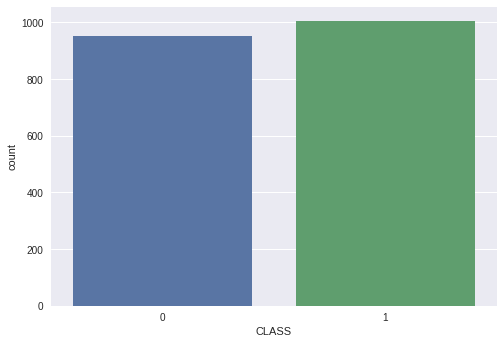

In [ ]:
sns.countplot(x=ds.CLASS)

In [ ]:
ds['CONTENT'].value_counts()


Check out this video on YouTube:﻿                                       97
Check out this playlist on YouTube:﻿                                    21
Check Out The New Hot Video By Dante B Called Riled Up                   6
Shakira :-*                                                              4
Hi. Check out and share our songs.                                       4
                                                                        ..
Holy crap. 800,000,000 views?!﻿                                          1
Hello I&#39;am from Palastine﻿                                           1
Check out this video on YouTube:<br /><br /><br /><br />﻿                1
Who&#39;s watching in 2015 Subscribe for me !﻿                           1
I&#39;m subscribing to you just because your comment was that great.     1
Name: CONTENT, Length: 1760, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0.98, 'Distribution of number of No: Characters in Comments')

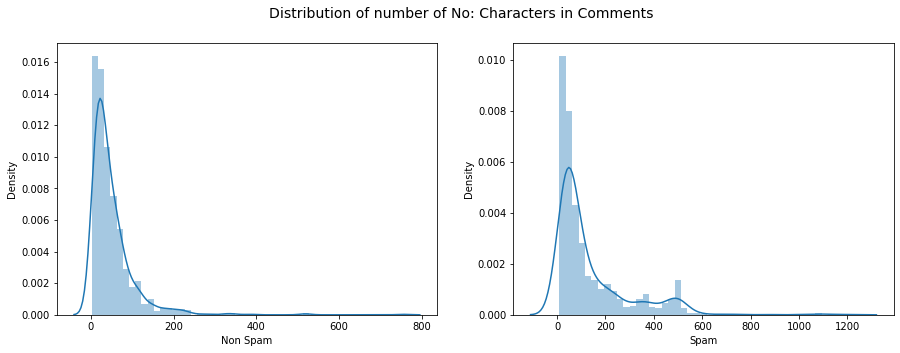

In [ ]:
# Distribution of characters
from collections import defaultdict,Counter
from multiprocessing import Pool

from statistics import *

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px
import plotly.offline as py

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from wordcloud import WordCloud, STOPWORDS

from scipy.stats import norm, kurtosis, skew

from tqdm import tqdm
tqdm.pandas() # To have a progress bar using progress_apply

import string, json, nltk, gc

fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.distplot(ds[ds['CLASS']==0]['CONTENT'].str.len(), axlabel="Non Spam", ax=ax[0])
sns.distplot(ds[ds['CLASS']==1]['CONTENT'].str.len(), axlabel="Spam", ax=ax[1])

fig.show()

fig.suptitle("Distribution of number of characters in comments", fontsize=14)

#Non spam comments are much shorter

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0.98, 'Distribution of number of No: Words in Comments - Toxicity')

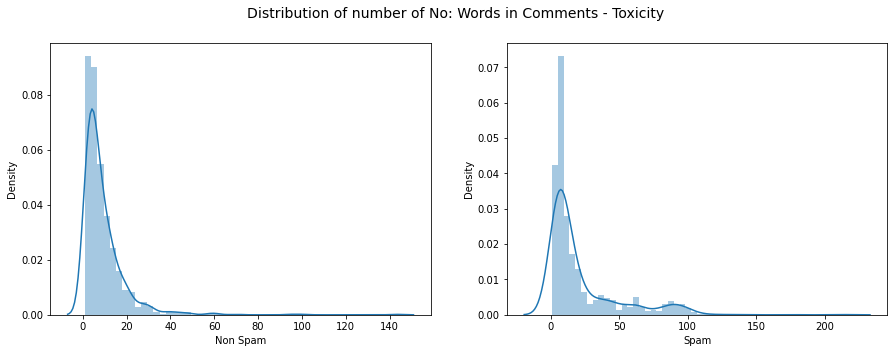

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.distplot(ds[ds['CLASS']==0]['CONTENT'].str.split().str.len(), axlabel="Non Spam", ax=ax[0])
sns.distplot(ds[ds['CLASS']==1]['CONTENT'].str.split().str.len(), axlabel="Spam", ax=ax[1])

fig.show()

fig.suptitle("Distribution of number of words in comments", fontsize=14)

In [ ]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
plt.style.use('seaborn')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: ignored

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def preprocess_comments(df, stop=stop, n=1, col='CONTENT'):
    new_corpus=[]
    
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    
    for text in tqdm(df[col], total=len(df)):
        words = [w for w in word_tokenize(text) if (w not in stop)]
       
        words = [lem.lemmatize(w) for w in words if(len(w)>n)]
     
        new_corpus.append(words)
        
    new_corpus = [word for l in new_corpus for word in l]
    
    return new_corpus

100%|██████████| 1005/1005 [00:00<00:00, 2288.67it/s]


Text(0.5, 0.98, 'Common stopwords in dataset')

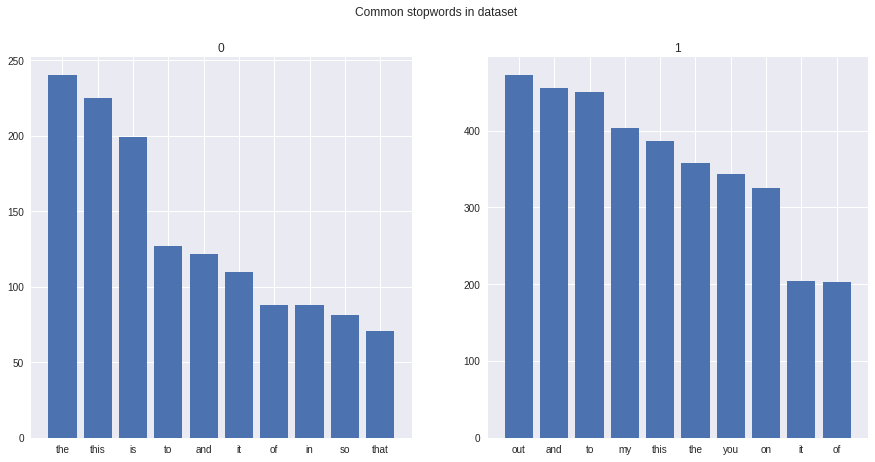

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

for i in range(2):
    new = ds[ds['CLASS']== i]
    corpus_train = preprocess_comments(new, {})
    
    dic = defaultdict(int)
    for word in corpus_train:
        if word in stop:
            dic[word]+=1
            
    top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x, y = zip(*top)
    ax[i].bar(x,y)
    ax[i].set_title(str(i))

fig.suptitle("Common stopwords in dataset")

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n),stop_words=stop).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

Text(0.5, 0.98, 'Common bigrams in dataset')

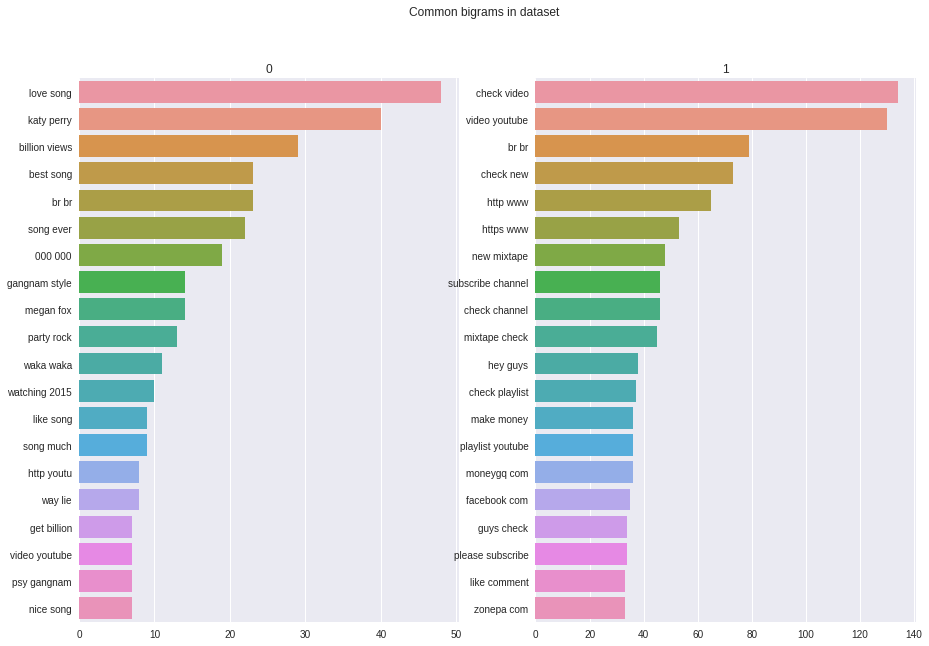

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,10))

for i in range(2):
    new = ds[ds['CLASS'] == i]['CONTENT']
    top_n_bigrams = get_top_ngram(new, 2)[:20]
    x, y = map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x,ax=ax[i])
    ax[i].set_title(str(i))
    
fig.suptitle("Common bigrams in dataset")

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None,ax=None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=50, 
        scale=3,
        random_state=1 
        )
    
    wordcloud = wordcloud.generate(str(data))
    ax.imshow(wordcloud,interpolation='nearest')
    ax.axis('off')

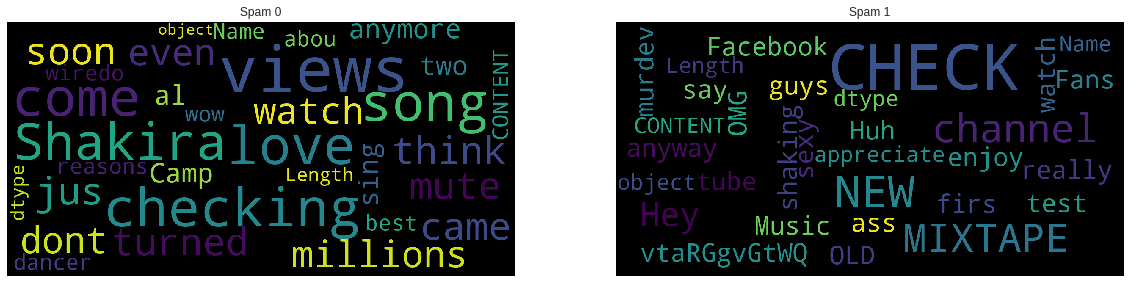

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,12))

for i in range(2):
    new = ds[ds['CLASS'] == i]['CONTENT']
    show_wordcloud(new, ax=ax[i])
    ax[i].set_title("Spam " + str(i))

